Supervised Learning (Logistic Regression) Accuracy: 0.71
Unsupervised Learning (K-means) Silhouette Score: 0.0050861635602666615


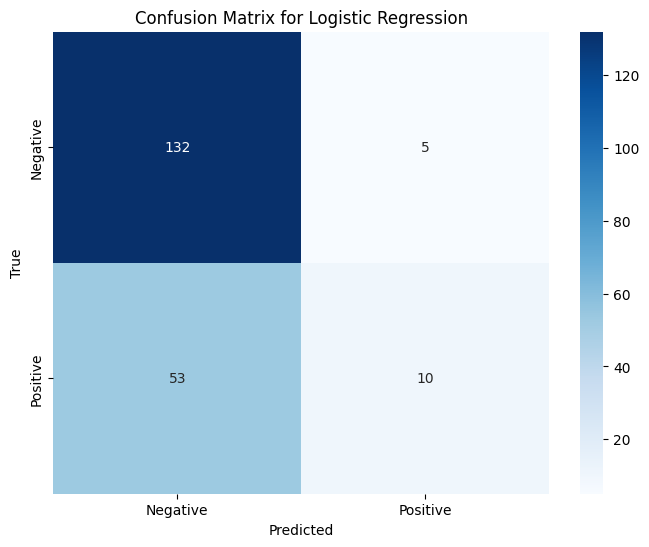

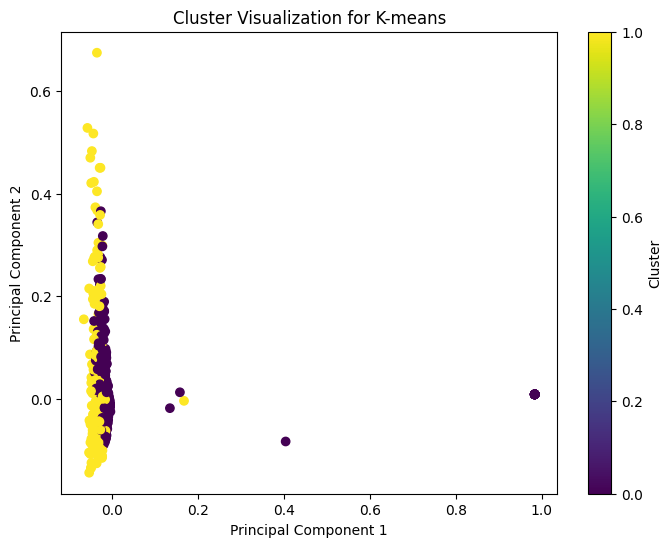

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load dataset
data = pd.read_csv("datasets/Sentiment Analysis Dataset.csv", encoding='latin1')

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Preprocessing data
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Supervised Learning - Logistic Regression
# Vectorizing text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training the model
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

# Testing the model
y_pred = clf.predict(X_test_vec)
accuracy_supervised = accuracy_score(y_test, y_pred)

# Unsupervised Learning - K-means Clustering
# Vectorizing text data
vectorizer_unsupervised = TfidfVectorizer()
X_vec_unsupervised = vectorizer_unsupervised.fit_transform(data['text'])

# Applying K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_vec_unsupervised)
silhouette_score_kmeans = silhouette_score(X_vec_unsupervised, cluster_labels_kmeans)

# Printing results
print("Supervised Learning (Logistic Regression) Accuracy:", accuracy_supervised)
print("Unsupervised Learning (K-means) Silhouette Score:", silhouette_score_kmeans)

# Reduce TF-IDF vectors to 2 dimensions for visualization
pca = PCA(n_components=2)
X_vec_unsupervised_reduced = pca.fit_transform(X_vec_unsupervised.toarray())

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Cluster Visualization for K-means
plt.figure(figsize=(8, 6))
plt.scatter(X_vec_unsupervised_reduced[:, 0], X_vec_unsupervised_reduced[:, 1], c=cluster_labels_kmeans, cmap='viridis')
plt.title('Cluster Visualization for K-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()